In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from multiprocessing import Pool

import utils.lifesense_utils as ls_utils

%matplotlib inline

# Load Data

## External data and sources

### Coronavirus cases

#### Global
- https://ourworldindata.org/coronavirus-source-data
- https://github.com/CSSEGISandData/COVID-19

In [7]:
covid_file_loc = "/home/tliu/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
covid_confirmed_df = pd.read_csv(covid_file_loc)
covid_confirmed_df[covid_confirmed_df['Country/Region'] == 'US']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
100,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,0,0,0,0,0,0,267,366,442,568
101,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,0,0,0,0,0,0,173,220,328,421
102,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,0,0,0,0,0,0,144,177,221,282
103,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,0,0,0,0,0,0,92,95,108,123
104,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,45,45,45,45,45,45,46,46,46,46
105,Grand Princess,US,37.6489,-122.6655,0,0,0,0,0,0,...,0,0,0,21,21,21,21,21,21,21
106,Georgia,US,33.0406,-83.6431,0,0,0,0,0,0,...,0,0,0,0,0,0,17,23,31,42
107,Colorado,US,39.0598,-105.3111,0,0,0,0,0,0,...,0,0,0,0,0,0,15,34,45,49
108,Florida,US,27.7663,-81.6868,0,0,0,0,0,0,...,0,0,0,0,0,0,15,28,35,50
109,New Jersey,US,40.2989,-74.5210,0,0,0,0,0,0,...,0,0,0,0,0,0,15,23,29,29


### Stock market

- **S&P 500**: [Yahoo Finance](https://finance.yahoo.com/quote/%5EGSPC/history/)

In [9]:
sp500_file_loc = "/home/tliu/covid-anxiety/data/^GSPC.csv"
sp500_df = pd.read_csv(sp500_file_loc)
sp500_df[sp500_df['Date'] >= '2020-01-01']

,Date,Open,High,Low,Close,Adj Close,Volume
203,2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000
204,2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
205,2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
206,2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
207,2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000
208,2020-01-09,3266.030029,3275.580078,3263.669922,3274.699951,3274.699951,3638390000
209,2020-01-10,3281.810059,3282.989990,3260.860107,3265.350098,3265.350098,3212970000
210,2020-01-13,3271.129883,3288.129883,3268.429932,3288.129883,3288.129883,3456380000
211,2020-01-14,3285.350098,3294.250000,3277.189941,3283.149902,3283.149902,3665130000
212,2020-01-15,3282.270020,3298.659912,3280.689941,3289.290039,3289.290039,3716840000


## EMA

In [88]:
pids = []
wave2_id_file_loc = "/home/tliu/lifesense/wave2_wk4_ids.txt"
with open(wave2_id_file_loc, "r") as wave_f:
    for line in wave_f.readlines():
        pids.append(line.strip())

In [89]:
keep_cols = ['data_source', 'distracted', 'energetic', 'stress', 'mood', 'for_yesterday', 'generator', 'generator-id', 'pid', 'source', 'timestamp', 'timezone', 'timezone-offset']

In [90]:
ema_file_loc = "/data/tliu/wave2/{}_ema/{}.df"

time_of_days = ['morning', 'afternoon', 'evening']

ema_df = pd.DataFrame()
for pid in pids:
    for tod in time_of_days:
        df = pd.read_pickle(ema_file_loc.format(tod, pid))
        if df.shape[0] > 0:
            df = df[keep_cols]
            #df['time_of_day'] = tod
            ema_df = ema_df.append(df, sort=True)

In [91]:
ema_df.shape

(4320, 13)

### Clean EMA

In [92]:
# format time
ema_df = ls_utils.format_time(ema_df)
# format EMAs
ema_cols = ['stress', 'mood', 'energetic', 'distracted']
ema_df[ema_cols] = ema_df[ema_cols].astype(float)

In [93]:
# correct for_yesterday
grouped = ema_df.groupby(['pid', 'date'], as_index=False)['mood'].count()
print(grouped['mood'].std())
#display(ema_df[ema_df['for_yesterday'] == True][['pid', 'date']].head())
ema_df.loc[ema_df['for_yesterday'] == True, 'date'] = ema_df[ema_df['for_yesterday']]['date'] - pd.Timedelta(1, unit='D')
grouped = ema_df.groupby(['pid', 'date'], as_index=False)['mood'].count()
print(grouped['mood'].std())
#display(ema_df[ema_df['for_yesterday'] == True][['pid', 'date']].head())

0.8846033284387749
0.7734247789991838


In [95]:
# take daily mean of stress, mood, energetic, distracted for each partcipant
daily_ema_df = ema_df.groupby(['pid', 'date'], as_index=False)[emas].mean()
daily_ema_df

,pid,date,stress,mood,energetic,distracted
0,01515998,2020-02-11,4.000000,4.000000,4.000000,4.000000
1,01515998,2020-02-12,4.333333,3.750000,3.666667,3.666667
2,01515998,2020-02-13,4.000000,4.000000,2.750000,4.000000
3,01515998,2020-02-14,4.000000,4.500000,3.500000,4.500000
4,01515998,2020-02-15,4.333333,4.666667,3.666667,4.666667
5,01515998,2020-02-16,5.000000,5.500000,4.000000,4.000000
6,01515998,2020-02-17,3.000000,3.500000,3.000000,3.500000
7,01515998,2020-03-03,4.000000,4.000000,4.000000,4.000000
8,01515998,2020-03-04,4.000000,3.666667,2.000000,4.000000
9,01515998,2020-03-05,3.500000,3.500000,3.000000,4.000000


In [96]:
# take average across individuals
print(daily_ema_df['date'].value_counts())
ts_daily_df = ema_df.groupby(['date'], as_index=False)[emas].mean()

2020-03-04    130
2020-03-06    129
2020-03-07    128
2020-03-08    128
2020-02-14    127
2020-03-03    126
2020-02-12    125
2020-02-16    125
2020-03-05    124
2020-03-09    124
2020-02-15    123
2020-02-17    122
2020-02-13    121
2020-02-11    121
Name: date, dtype: int64

In [105]:
daily_ema_df['date'].unique()

array(['2020-02-11T00:00:00.000000000', '2020-02-12T00:00:00.000000000',
       '2020-02-13T00:00:00.000000000', '2020-02-14T00:00:00.000000000',
       '2020-02-15T00:00:00.000000000', '2020-02-16T00:00:00.000000000',
       '2020-02-17T00:00:00.000000000', '2020-03-03T00:00:00.000000000',
       '2020-03-04T00:00:00.000000000', '2020-03-05T00:00:00.000000000',
       '2020-03-06T00:00:00.000000000', '2020-03-07T00:00:00.000000000',
       '2020-03-08T00:00:00.000000000', '2020-03-09T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [113]:
start_date = '2020-02-01'
end_date = '2020-03-13'

In [119]:
impute_df = daily_ema_df.copy()
for date in pd.date_range(start=start_date, end=end_date):
    if daily_ema_df[daily_ema_df['date'] == date].shape[0] == 0:
        print(date)
        empty = pd.Series(index=daily_ema_df.columns)
        empty['date'] = date
        impute_df = impute_df.append(empty, ignore_index=True)

2020-02-01 00:00:00
2020-02-02 00:00:00
2020-02-03 00:00:00
2020-02-04 00:00:00
2020-02-05 00:00:00
2020-02-06 00:00:00
2020-02-07 00:00:00
2020-02-08 00:00:00
2020-02-09 00:00:00
2020-02-10 00:00:00
2020-02-18 00:00:00
2020-02-19 00:00:00
2020-02-20 00:00:00
2020-02-21 00:00:00
2020-02-22 00:00:00
2020-02-23 00:00:00
2020-02-24 00:00:00
2020-02-25 00:00:00
2020-02-26 00:00:00
2020-02-27 00:00:00
2020-02-28 00:00:00
2020-02-29 00:00:00
2020-03-01 00:00:00
2020-03-02 00:00:00
2020-03-10 00:00:00
2020-03-11 00:00:00
2020-03-12 00:00:00
2020-03-13 00:00:00


In [120]:
impute_df.tail(10)

,pid,date,stress,mood,energetic,distracted
1771,NaN,2020-02-26,NaN,NaN,NaN,NaN
1772,NaN,2020-02-27,NaN,NaN,NaN,NaN
1773,NaN,2020-02-28,NaN,NaN,NaN,NaN
1774,NaN,2020-02-29,NaN,NaN,NaN,NaN
1775,NaN,2020-03-01,NaN,NaN,NaN,NaN
1776,NaN,2020-03-02,NaN,NaN,NaN,NaN
1777,NaN,2020-03-10,NaN,NaN,NaN,NaN
1778,NaN,2020-03-11,NaN,NaN,NaN,NaN
1779,NaN,2020-03-12,NaN,NaN,NaN,NaN
1780,NaN,2020-03-13,NaN,NaN,NaN,NaN


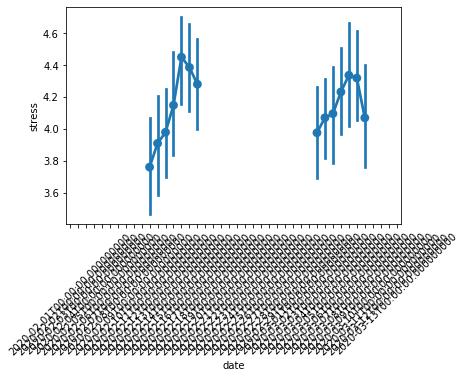

In [131]:
sns.pointplot(x='date', y='stress', data=impute_df)
            #hue=impute_df["mood"].isna().cumsum(), 
            #palette=["blue"]*sum(impute_df["mood"].isna()), 
            #legend=False, markers=True)
plt.xticks(rotation=45)
plt.show()

In [157]:
daily_ema_df.to_pickle("/home/tliu/covid-anxiety/data/daily_ema.df")

## PHQ

## Semantic Location Labels

In [163]:
def extract_slocs(row, loc_attr, max_nbr):
    """extracts semantic location information from each row"""
    loc_df = pd.DataFrame()
    for i in range(max_nbr):
        # check for lat/long
        lat = "place-latitude-{}".format(i)
        if not pd.isnull(row[lat]):
            # we have a valid row
            row_dict = {}
            # populate metadata
            for col in keep_cols:
                row_dict[col] = row[col]
            # populate location attributes
            for attr in loc_attr:
                attr_name = "{}-{}".format(attr, i) 
                if attr_name in row.index and not pd.isnull(row[attr_name]):
                    row_dict[attr] = row[attr_name]
                else:
                    row_dict[attr] = np.nan
            series = pd.Series(row_dict)
            #print(series)
            loc_df = loc_df.append(series, ignore_index=True)
    return loc_df    

In [169]:
even_file_loc = "/data/tliu/wave2/evening_ema/{}.df"
keep_cols = ['source', 'timestamp', 'timezone-offset', 'data_source', 'date']

even_ema_df = pd.DataFrame()
for pid in pids:
    df = pd.read_pickle(even_file_loc.format(pid))
    if df.shape[0] > 0:
        sel_cols = df.columns[df.columns.isin(keep_cols) | df.columns.str.startswith("place")]
        sel_df = df[sel_cols]
        even_ema_df = even_ema_df.append(sel_df, sort=True)
        #print(even_ema_df.shape)

In [170]:
even_ema_df = ls_utils.format_time(even_ema_df)

In [171]:
cols = list(even_ema_df.columns[even_ema_df.columns.str.startswith('place')].values)
# remove trailing numbering
attributes = ['-'.join(col.split('-')[:-1]) for col in cols]
attributes = list(set(attributes))

In [172]:
nbrs = [int(col.split('-')[-1]) for col in cols]
max(nbrs)

13

In [173]:
%%time

semantic_locs = pd.DataFrame()
for i, row in even_ema_df.iterrows():
    df = extract_slocs(row, attributes, 14)
    semantic_locs = semantic_locs.append(df)

CPU times: user 17.7 s, sys: 12.2 ms, total: 17.7 s
Wall time: 17.7 s


In [184]:
even_phq_file_loc = "/data/tliu/wave2/evening_phq8/{}.df"
keep_cols = ['source', 'timestamp', 'timezone-offset', 'data_source', 'date']

even_phq_df = pd.DataFrame()
for pid in pids:
    df = pd.read_pickle(even_phq_file_loc.format(pid))
    if df.shape[0] > 0:
        sel_cols = df.columns[df.columns.isin(keep_cols) | df.columns.str.startswith("place")]
        sel_df = df[sel_cols]
        even_phq_df = even_phq_df.append(sel_df, sort=True)
        #print(even_phq_df.shape)

In [185]:
even_phq_df = ls_utils.format_time(even_phq_df)

In [186]:
cols = list(even_phq_df.columns[even_phq_df.columns.str.startswith('place')].values)
# remove trailing numbering
attributes = ['-'.join(col.split('-')[:-1]) for col in cols]
attributes = list(set(attributes))

In [187]:
nbrs = [int(col.split('-')[-1]) for col in cols]
max(nbrs)

13

In [188]:
%%time

semantic_phq_locs = pd.DataFrame()
for i, row in even_phq_df.iterrows():
    df = extract_slocs(row, attributes, 14)
    semantic_phq_locs = semantic_phq_locs.append(df)

CPU times: user 5.86 s, sys: 9.99 ms, total: 5.87 s
Wall time: 5.88 s


In [189]:
semantic_locs.shape

(2447, 14)

In [190]:
semantic_phq_locs.shape

(526, 14)

In [191]:
semantic_locs = semantic_locs.append(semantic_phq_locs)
semantic_locs = semantic_locs.sort_values(by=['source', 'date'])

In [192]:
semantic_locs.shape
semantic_locs['place-kind'].value_counts()

Home                                                       1120
Work                                                        401
Food and Drink                                              217
Shopping                                                    202
Another Person's Home                                       184
I Was Not There                                             167
Errand                                                      163
Other…                                                      135
Entertainment                                                85
Medical/Dentist/Mental Health                                82
Commute/Travel (Airport, Bus Stop, Train Station, Etc.)      79
Gym/Exercise                                                 37
Walking                                                      33
Education                                                    32
Place of Worship (Church, Temple, Etc.)                      19
Beauty/Grooming                         

In [193]:
semantic_locs['pid'] = semantic_locs['source']

In [194]:
semantic_locs.to_pickle("/home/tliu/covid-anxiety/data/slocs.df")

## Location

In [ ]:
%%time

fus_loc = "/data/tliu/wave2/pdk-location"
fus_args = [(pid, fus_loc) for pid in pids]

with Pool(10) as pool:
    fus_results = pool.starmap(ls_utils.build_fus, fus_args)

29504072
(939, 18)
16052899
(831, 18)
24390140
(4403, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr
/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr


26192608
(6054, 18)
15266887
(7219, 18)
14673820
(7579, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:183: RuntimeWarning: divide by zero encountered in log
  label_group['entropy'] = -(np.log(label_group) * label_group).sum(axis=1)


99558567
(8959, 18)
69820876
(8546, 18)
68460425
(6701, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr


23255906
(9114, 18)
01515998


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr


(5871, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr
/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr
/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

37057080
(8836, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr
/home/tliu/lifesense/utils/lifesense_utils.py:183: RuntimeWarning: divide by zero encountered in log
  label_group['entropy'] = -(np.log(label_group) * label_group).sum(axis=1)


21517496
(6047, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr
/home/tliu/lifesense/utils/lifesense_utils.py:183: RuntimeWarning: divide by zero encountered in log
  label_group['entropy'] = -(np.log(label_group) * label_group).sum(axis=1)
/home/tliu/lifesense/utils/lifesense_utils.py:183: RuntimeWarning: divide by zero encountered in log
  label_group['entropy'] = -(np.log(label_group) * label_group).sum(axis=1)


69045373
26222720
(5927, 18)
43521459
(7902, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr
/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr
/home/tliu/lifesense/utils/lifesense_utils.py:183: RuntimeWarning: divide by zero encountered in log
  label_group['entropy'] = -(np.log(label_group) 

38070362
(6054, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr
/home/tliu/lifesense/utils/lifesense_utils.py:183: RuntimeWarning: divide by zero encountered in log
  label_group['entropy'] = -(np.log(label_group) * label_group).sum(axis=1)


79755032
(8023, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr
/home/tliu/lifesense/utils/lifesense_utils.py:183: RuntimeWarning: divide by zero encountered in log
  label_group['entropy'] = -(np.log(label_group) * label_group).sum(axis=1)


03925638
(8833, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr
/home/tliu/lifesense/utils/lifesense_utils.py:183: RuntimeWarning: divide by zero encountered in log
  label_group['entropy'] = -(np.log(label_group) * label_group).sum(axis=1)


05348360
(7529, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr
/home/tliu/lifesense/utils/lifesense_utils.py:183: RuntimeWarning: divide by zero encountered in log
  label_group['entropy'] = -(np.log(label_group) * label_group).sum(axis=1)


20841577
(956, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr
/home/tliu/lifesense/utils/lifesense_utils.py:183: RuntimeWarning: divide by zero encountered in log
  label_group['entropy'] = -(np.log(label_group) * label_group).sum(axis=1)


14456223
(7766, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr
/home/tliu/lifesense/utils/lifesense_utils.py:183: RuntimeWarning: divide by zero encountered in log
  label_group['entropy'] = -(np.log(label_group) * label_group).sum(axis=1)


98724064
(8333, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr
/home/tliu/lifesense/utils/lifesense_utils.py:183: RuntimeWarning: divide by zero encountered in log
  label_group['entropy'] = -(np.log(label_group) * label_group).sum(axis=1)


96968904
(6820, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr
/home/tliu/lifesense/utils/lifesense_utils.py:183: RuntimeWarning: divide by zero encountered in log
  label_group['entropy'] = -(np.log(label_group) * label_group).sum(axis=1)
/home/tliu/lifesense/utils/lifesense_utils.py:183: RuntimeWarning: divide by zero encountered in log
  label_group['entropy'] = -(np.log(label_group) * label_group).sum(axis=1)


05498364
(2926, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr


13195321
(5717, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr
/home/tliu/lifesense/utils/lifesense_utils.py:183: RuntimeWarning: divide by zero encountered in log
  label_group['entropy'] = -(np.log(label_group) * label_group).sum(axis=1)


84995481
(6328, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr
/home/tliu/lifesense/utils/lifesense_utils.py:183: RuntimeWarning: divide by zero encountered in log
  label_group['entropy'] = -(np.log(label_group) * label_group).sum(axis=1)


94758398
(8165, 18)


/home/tliu/lifesense/utils/lifesense_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fus['stationary'] = fus['velocity'] < 1 # filter locations that have a speed of greater than 1 km/hr


## Communication

## Processing TODOs

- collect US cases into states and census regions
- semantic location processing
- evening EMA contact columns
- move extract_slocs to feature_pipeline.py

# Sandbox

In [133]:
slocs = pd.read_pickle("~/lifesense/ls_data/slocs.df")

In [134]:
slocs.head()

,data_source,date,place-home-other,place-home-type,place-kind,place-latitude,place-longitude,place-medical-type,place-name,place-other,place-with-others,source,timestamp,timezone-offset,pid
0,wave1,2019-07-30,,NaN,Home,30.398706452380956,-91.97611253333334,NaN,,,NaN,00746649,1.564533e+09,-18000.0,00746649
1,wave1,2019-07-30,,NaN,Work,30.117045583333336,-91.99621346666667,NaN,,,NaN,00746649,1.564533e+09,-18000.0,00746649
2,wave1,2019-07-30,,NaN,Work,30.11356467857143,-92.02024155000001,NaN,,,NaN,00746649,1.564533e+09,-18000.0,00746649
3,wave1,2019-07-30,,NaN,Work,30.104619033333336,-91.99334409444442,NaN,,,NaN,00746649,1.564533e+09,-18000.0,00746649
4,wave1,2019-07-30,,NaN,Food and Drink,30.109440062500003,-91.9910157125,NaN,Subway,,alone,00746649,1.564533e+09,-18000.0,00746649
